## 1. Установка и импорт библиотек

In [ ]:
# !pip install swifter
# !pip install pandasql
# !pip install cufflinks
# !pip install fastparquet
# !pip install pyarrow
# !pip install pandas==1.5.3

In [4]:
import pandas as pd
import numpy as np
import csv
import swifter
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import plotly.express as px

## 2. Работа с датасетом

### 2.1 Загружаем данные

In [5]:
lastfm = pd.read_csv('lastfm2.csv', 
                     quotechar='|', 
                     quoting=csv.QUOTE_ALL, 
                     delimiter=' ')

### 2.2 Обзор данных

#### В датасете 142335 строк и 18 колонок

In [6]:
lastfm.shape

(142335, 18)

In [7]:
lastfm.head(3)

album href album tag  album page  \
0  https://www.last.fm/music/Linkin+Park/Minutes+...      rock           1   
1  https://www.last.fm/music/Linkin+Park/Minutes+...      rock           1   
2  https://www.last.fm/music/Linkin+Park/Minutes+...      rock           1   

   album num           album name album artist  \
0          1  Minutes to Midnight  Linkin Park   
1          1  Minutes to Midnight  Linkin Park   
2          1  Minutes to Midnight  Linkin Park   

                                    album cover href  album listeners  \
0  https://lastfm.freetls.fastly.net/i/u/300x300/...          1910153   
1  https://lastfm.freetls.fastly.net/i/u/300x300/...          1910153   
2  https://lastfm.freetls.fastly.net/i/u/300x300/...          1910153   

   album scrobbles  album tracks_total album length album release date  \
0         52463554                  12          NaN        11 May 2007   
1         52463554                  12          NaN        11 May 2007   
2         52463554                  12          NaN        11 May 2007   

   track pos              track name track duration  track listeners  \
0          1                    Wake            NaN           392738   
1          2                Given Up           3:16           712634   
2          3  Leave Out All the Rest            NaN           885594   

   track scrobbles                                         track href  
0          2282570  https://www.last.fm/music/Linkin+Park/Minutes+...  
1          6165064  https://www.last.fm/music/Linkin+Park/Minutes+...  
2          8027430  https://www.last.fm/music/Linkin+Park/Minutes+...

#### Перечень  колонок

In [8]:
lastfm.columns

Index(['album href', 'album tag', 'album page', 'album num', 'album name',
       'album artist', 'album cover href', 'album listeners',
       'album scrobbles', 'album tracks_total', 'album length',
       'album release date', 'track pos', 'track name', 'track duration',
       'track listeners', 'track scrobbles', 'track href'],
      dtype='object')

#### Общая информация о колонках (типы данных, кол-во не пустых значений)

In [9]:
lastfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142335 entries, 0 to 142334
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   album href          142335 non-null  object
 1   album tag           142335 non-null  object
 2   album page          142335 non-null  int64 
 3   album num           142335 non-null  int64 
 4   album name          142335 non-null  object
 5   album artist        142335 non-null  object
 6   album cover href    142335 non-null  object
 7   album listeners     142335 non-null  int64 
 8   album scrobbles     142335 non-null  int64 
 9   album tracks_total  142335 non-null  int64 
 10  album length        76734 non-null   object
 11  album release date  141246 non-null  object
 12  track pos           142335 non-null  int64 
 13  track name          142334 non-null  object
 14  track duration      124164 non-null  object
 15  track listeners     142335 non-null  int64 
 16  tr

##### Как видно имеется 8 колонок с числовыми данными (тип int64) и 10 колонок с данными типа object  

### 2.3 Статистический обзор данных

#### Статистка данных в числовых колонках

In [10]:
lastfm.describe().apply(lambda s: s.apply(lambda x: f'{x:,.0f}'))

album page album num album listeners album scrobbles album tracks_total  \
count    142,335   142,335         142,335         142,335            142,335   
mean          13        11         114,429       1,503,833                 23   
std            7         6         175,197       3,534,467                 34   
min            1         1               2             134                  1   
25%            6         6          20,138         249,693                 12   
50%           12        11          55,703         599,502                 14   
75%           19        15         135,059       1,494,717                 21   
max           25        20       2,594,490      89,918,968                414   

      track pos track listeners track scrobbles  
count   142,335         142,335         142,335  
mean         12          48,153         283,483  
std          16         126,046         962,845  
min           1               0               0  
25%           4           2,176           7,408  
50%           8           9,739          39,186  
75%          13          35,294         155,874  
max         200       2,808,905      30,223,960

##### В числовых колонках пропуски не обнаружены

#### Статистика данных в колонках типа object

In [11]:
lastfm.describe(include=['object'])

album href  album tag  \
count                                              142335     142335   
unique                                               9412         24   
top     https://www.last.fm/music/Fr%C3%A9d%C3%A9ric+C...  classical   
freq                                                  200       8554   

           album name     album artist  \
count          142335           142335   
unique           9085             5316   
top     Greatest Hits  Various Artists   
freq              815             1188   

                                         album cover href album length  \
count                                              142335        76734   
unique                                               9380         3135   
top     https://lastfm.freetls.fastly.net/i/u/300x300/...       916:04   
freq                                                  508          200   

       album release date track name track duration  \
count              141246     142334         124164   
unique               4634     103916           1095   
top        1 January 2008      Intro           3:35   
freq                 1808        203            858   

                                               track href  
count                                              142335  
unique                                             127539  
top     https://www.last.fm/music/Cracker/Kerosene+Hat...  
freq                                                   83

##### Видны пропуски в колонках: 
- "album length" (длительность альбома) - 46% всех значений 
- "album release date" (дата релиза альбома) - 0.8% всех значений
- "track duration" (длительность трека) - 12.8% всех значений
- "track name" (название трека) - одно значение из 142335 - 0.0007% всех значений =)

#### Распределение треков по тегами (всего 24 уникальных тега)

In [12]:
tag_tracks_counts = lastfm['album tag'].value_counts()
tag_tracks_counts

classical           8554
country             7217
punk                7206
rock                6906
blues               6894
rap                 6575
reggae              6467
hip-hop             6420
metal               6407
80s                 6255
hardcore            6219
post-punk           6084
jazz                6048
electronic          5721
british             5516
neoclassical        5497
indie               5355
alternative         5308
rnb                 5271
acoustic            5174
modern classical    4871
russian             4521
dance               4516
composer            3333
Name: album tag, dtype: int64

##### гистограмма

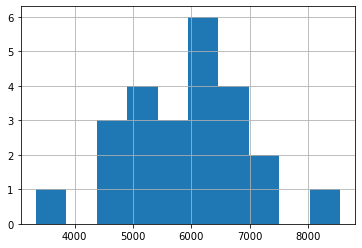

In [13]:
_ = tag_tracks_counts.hist(bins = 10)

#### Это же распределение в виде столбчатой диаграммы

In [67]:
barchart = lastfm.\
groupby('album tag')\
.size()\
.to_frame('count')\
.reset_index()\
.sort_values(by='count', ascending=False)

##### вертикальная диаграмма

In [68]:
barchart\
.iplot( 
        x = 'album tag',
        y = 'count',
        kind='bar',
        bins=30,
        xTitle='Tag',
        linecolor='black',
        yTitle='Number of tracks' ,
        title='Tracks distribution by tags'
      )

##### горизонтальная диаграмма

In [69]:
barchart\
.sort_values(by='count')\
.iplot( 
        x = 'album tag',
        y = 'count',
        kind='bar',
        bins=30,
        yTitle='Tag',
        linecolor='black',
        xTitle='Number of tracks' ,
        title='Tracks distribution by tags',
        orientation = 'h'
      )

#### Тоже самое, но в %

In [14]:
lastfm['album tag'].value_counts(normalize=True).apply(lambda x: f'{100*x:.2f}')

classical           6.01
country             5.07
punk                5.06
rock                4.85
blues               4.84
rap                 4.62
reggae              4.54
hip-hop             4.51
metal               4.50
80s                 4.39
hardcore            4.37
post-punk           4.27
jazz                4.25
electronic          4.02
british             3.88
neoclassical        3.86
indie               3.76
alternative         3.73
rnb                 3.70
acoustic            3.64
modern classical    3.42
russian             3.18
dance               3.17
composer            2.34
Name: album tag, dtype: object

#### Распределение альбомов по тегам

In [16]:
tags_albums = lastfm.groupby(['album href', 'album tag'])\
.size()\
.reset_index().groupby('album tag')\
.size()\
.to_frame('count')\
.reset_index()\
.sort_values(by='count')\
.reset_index(drop=True)
tags_albums

album tag  count
0           composer    267
1          classical    363
2            russian    371
3            british    391
4   modern classical    400
5        alternative    436
6       neoclassical    436
7              metal    438
8              dance    440
9                rnb    450
10          acoustic    452
11               80s    455
12         post-punk    456
13               rap    456
14              jazz    459
15            reggae    459
16              punk    460
17             blues    460
18           hip-hop    462
19              rock    466
20             indie    468
21        electronic    473
22           country    477
23          hardcore    484

##### гистограмма

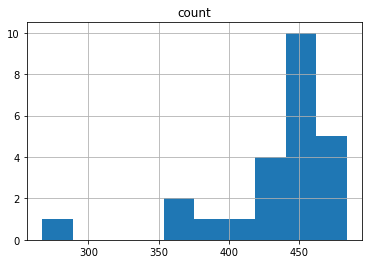

In [17]:
_ = tags_albums.hist()

##### диаграмма

In [70]:
tags_albums\
.sort_values(by='count')\
.iplot( 
        x = 'album tag',
        y = 'count',
        kind='bar',
        bins=30,
        yTitle='Tag',
        linecolor='black',
        xTitle='Number of tracks' ,
        title='Tracks distribution by tags',
        orientation = 'h'
      )

#### Тоже самое, но в %

In [19]:
tags_albums['percents'] = round(100 * tags_albums['count'] / tags_albums['count'].sum(), 2)
tags_albums[['album tag', 'percents']]

album tag  percents
0           composer      2.55
1          classical      3.46
2            russian      3.54
3            british      3.73
4   modern classical      3.82
5        alternative      4.16
6       neoclassical      4.16
7              metal      4.18
8              dance      4.20
9                rnb      4.29
10          acoustic      4.31
11               80s      4.34
12         post-punk      4.35
13               rap      4.35
14              jazz      4.38
15            reggae      4.38
16              punk      4.39
17             blues      4.39
18           hip-hop      4.41
19              rock      4.45
20             indie      4.47
21        electronic      4.51
22           country      4.55
23          hardcore      4.62

### 2.4 Сортировки

#### Top 10 треков по кол-ву уникальных слушателей

In [20]:
lastfm.sort_values(by='track listeners', ascending=False)\
[['album tag', 'album name','album artist', 'track name','track listeners']]\
.reset_index(drop=True)\
.head(10)

album tag                         album name           album artist  \
0         rock         Nevermind (Deluxe Edition)                Nirvana   
1         rock          Hot Fuss (Deluxe Version)            The Killers   
2         rock         Nevermind (Deluxe Edition)                Nirvana   
3  alternative                       Viva la Vida               Coldplay   
4      british  (What’s The Story) Morning Glory?                  Oasis   
5  alternative              The Best Of Radiohead              Radiohead   
6         rock   Californication (Deluxe Version)  Red Hot Chili Peppers   
7   electronic          The Fame Monster (Deluxe)              Lady Gaga   
8        dance          The Fame Monster (Deluxe)              Lady Gaga   
9        dance  The Fame Monster (Deluxe Edition)              Lady Gaga   

                track name  track listeners  
0  Smells Like Teen Spirit          2808905  
1           Mr. Brightside          2675307  
2          Come as You Are          2452261  
3             Viva la Vida          2207770  
4               Wonderwall          2141139  
5             Karma Police          2115862  
6          Californication          2070100  
7               Poker Face          2059905  
8               Poker Face          2059905  
9               Poker Face          2059905

#### Видно, что трек Poker Face дублируется с разными тегами и в разных альбомах, поэтому разумно вывести top 10 уникальных пар ['album artist','track name']

In [21]:
lastfm.groupby(['album artist', 'track name'])\
.max(['track listeners'])\
.reset_index()\
.sort_values(by='track listeners', ascending=False)\
[['album artist', 'track name','track listeners']]\
.reset_index(drop=True)\
.head(10)

album artist               track name  track listeners
0                Nirvana  Smells Like Teen Spirit          2808905
1            The Killers           Mr. Brightside          2675307
2                Nirvana          Come as You Are          2452261
3               Coldplay             Viva la Vida          2207770
4                  Oasis               Wonderwall          2141139
5              Radiohead             Karma Police          2115862
6  Red Hot Chili Peppers          Californication          2070100
7              Lady Gaga               Poker Face          2059905
8                   MGMT                     Kids          2048479
9            The Killers         Somebody Told Me          2027321

#### Top 10 треков по кол-ву прослушиваний (scrobbles). Первая таблица - это top в целом по датасету, вторая - по уникальным парам (артист,название трека)

In [22]:
lastfm.sort_values(by='track scrobbles', ascending=False)\
[['album tag', 'album name','album artist', 'track name','track scrobbles']]\
.reset_index(drop=True)\
.head(10)

album tag                                    album name    album artist  \
0         rock                     Hot Fuss (Deluxe Version)     The Killers   
1         rock                    Nevermind (Deluxe Edition)         Nirvana   
2  alternative                              Do I Wanna Know?  Arctic Monkeys   
3  alternative  Favourite Worst Nightmare (Standard Version)  Arctic Monkeys   
4         rock  Favourite Worst Nightmare (Standard Version)  Arctic Monkeys   
5          rnb                               Blinding Lights      The Weeknd   
6  alternative                                  Viva la Vida        Coldplay   
7  alternative                         The Best Of Radiohead       Radiohead   
8         rock                    Nevermind (Deluxe Edition)         Nirvana   
9  alternative          Oracular Spectacular/Congratulations            MGMT   

                track name  track scrobbles  
0           Mr. Brightside         30223960  
1  Smells Like Teen Spirit         24188159  
2         Do I Wanna Know?         23649926  
3                      505         22617704  
4                      505         22571264  
5          Blinding Lights         22358792  
6             Viva la Vida         21538913  
7             Karma Police         20905978  
8          Come as You Are         20632351  
9                     Kids         19818228

In [23]:
lastfm.groupby(['album artist', 'track name'])\
.max(['track scrobbles'])\
.reset_index()\
.sort_values(by='track scrobbles', ascending=False)\
[['album artist', 'track name','track scrobbles']]\
.reset_index(drop=True)\
.head(10)

album artist               track name  track scrobbles
0      The Killers           Mr. Brightside         30223960
1          Nirvana  Smells Like Teen Spirit         24188159
2   Arctic Monkeys         Do I Wanna Know?         23649926
3   Arctic Monkeys                      505         22617704
4       The Weeknd          Blinding Lights         22358792
5         Coldplay             Viva la Vida         21538913
6        Radiohead             Karma Police         20905978
7          Nirvana          Come as You Are         20632351
8             MGMT                     Kids         19818228
9  Various Artists              Sex on Fire         19310383

#### Top 10 альбомов - по уникальным слушателям

In [24]:
lastfm.groupby(['album name','album artist']).\
max('album listeners').\
reset_index().\
sort_values(by='album listeners', ascending=False)\
[['album name','album artist', 'album listeners']]\
.reset_index(drop=True)\
.head(10)

album name  album artist  album listeners
0                          Discovery     Daft Punk          2594490
1                         Graduation    Kanye West          2356492
2  My Beautiful Dark Twisted Fantasy    Kanye West          2001160
3                    The Eminem Show        Eminem          1961345
4                  808s & Heartbreak    Kanye West          1941734
5                  In Between Dreams  Jack Johnson          1919902
6                Minutes to Midnight   Linkin Park          1910153
7                  Late Registration    Kanye West          1701274
8                          Stankonia       OutKast          1685119
9              All The Right Reasons    Nickelback          1629841

#### Top 10 альбомов - по кол-ву прослушиваний (хотя бы один трек из альбома)

In [25]:
lastfm.groupby(['album name','album artist']).\
max('album scrobbles').\
reset_index().\
sort_values(by='album scrobbles', ascending=False)\
[['album name','album artist', 'album scrobbles']]\
.reset_index(drop=True)\
.head(10)

album name     album artist  album scrobbles
0  My Beautiful Dark Twisted Fantasy       Kanye West         89918968
1                         Graduation       Kanye West         81320996
2                          Discovery        Daft Punk         69148603
3                          Positions    Ariana Grande         59996798
4                  Late Registration       Kanye West         58566600
5                    Crystal Castles  Crystal Castles         57995100
6                        Madvillainy       Madvillain         56611282
7             Ultraviolence (Deluxe)     Lana Del Rey         54972627
8                                D-2          Agust D         53572552
9                Minutes to Midnight      Linkin Park         52463554

### 2.5 Разные распределения и статистики

#### Сколько альбомов выходило за каждый конкретный год (из датасета). График Оx - Год, Oy - сколько было альбомов

In [26]:
print("Число пропусков по полю 'album release date':", len(lastfm[lastfm['album release date'].isna()]))

Число пропусков по полю 'album release date': 1089


In [27]:
lastfm['album_year'] = lastfm['album release date'].apply(str).apply(lambda x: x[-4:])

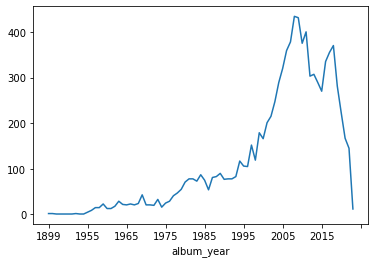

In [28]:
_ = lastfm[~lastfm['album release date'].isna()]\
.groupby('album_year')\
['album href']\
.nunique().plot()

#### Ссылки на альбомы со "странными" датами релиза

In [29]:
lastfm[lastfm['album_year'] <= '1920']['album href'].unique()

array(['https://www.last.fm/music/Art+Tatum/Piano+Starts+Here',
       'https://www.last.fm/music/Heaven+17/Penthouse+And+Pavement',
       'https://www.last.fm/music/Heaven+17/The+Luxury+Gap',
       'https://www.last.fm/music/Edward+Maya/Stereo+Love'], dtype=object)

##### Сходив по ссылками, можно убедиться, что имеено эти "странные" даты отображаются на страницах

####  Распределение треков по годам

In [73]:
lastfm[~lastfm['album release date'].isna()]['album_year']\
.sort_values()\
.iplot(
    kind='hist',
    bins=30,
    xTitle='Year',
    linecolor='black',
    yTitle='Count tracks' ,
    title='Tracks distribution by years')

#### Сколько в среднем композиций в альбоме (а также какова медиана и мода)

In [30]:
album_size = lastfm.groupby('album href').size()
print(f'Среднее значение: {album_size.mean():.2f}')
print(f'Медиана: {album_size.median():.2f}')
print(f'Мода: {album_size.mode()[0]:.2f}')

Среднее значение: 15.12
Медиана: 12.00
Мода: 12.00


##### Гистограмма

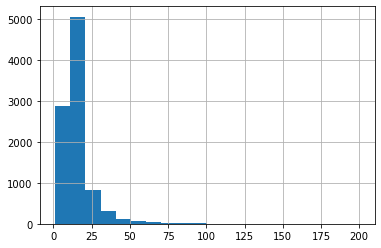

In [31]:
_ =  album_size.hist(bins=20)

#### Сколько в среднем  длина композиции (а также медиана, стандартное отклонение от среднего, минимум и максимум) в зависимости от "жанра"

In [32]:
lastfm['track duration'] = lastfm['track duration'].fillna('0')

In [33]:
def get_sec(x):
    x = x.split(':')
    try:
        return int(x[0])*60 + int(x[1])
    except:
        return 0

In [34]:
lastfm['duration'] = lastfm['track duration'].swifter.apply(get_sec)

Pandas Apply:   0%|          | 0/142335 [00:00<?, ?it/s]

In [35]:
lastfm[lastfm['duration'] != 0]\
.groupby('album tag')['duration']\
.agg(['mean', 'median', 'std', 'min', 'max'])\
.sort_values(by = 'mean', ascending = False)\
.reset_index()

album tag        mean  median         std  min   max
0          classical  253.449623   214.0  186.261579    4  4126
1              metal  252.652731   240.0  117.026620    3  1448
2               jazz  252.054495   224.0  128.856053    1  1808
3   modern classical  248.974906   214.0  208.821415    7  4844
4                80s  246.917192   238.0   77.640353    1  1354
5         electronic  246.106606   235.0  101.395319    4  1561
6       neoclassical  245.282407   229.0  130.052860   10  1380
7               rock  235.646718   224.0   96.211663    3  1706
8             reggae  232.211008   225.0   82.134194    6  1714
9           acoustic  230.655274   221.0   88.337861    1  1106
10             dance  230.438055   219.0   76.621778    4   937
11             blues  229.679252   208.0   97.551424   10  1041
12          composer  228.712005   188.0  199.255618    4  3132
13           british  226.450714   218.0   87.460459    4  1381
14         post-punk  225.091249   219.0   81.854626    3   888
15       alternative  223.646339   219.0   87.558439    4  1753
16           russian  221.641107   216.0   93.497393    4  1433
17               rnb  218.772737   220.0   84.368767    4  3922
18             indie  211.618060   210.0   75.390649    3   910
19               rap  211.509561   216.0   76.332851    2  1363
20           country  209.550276   207.0   71.657901    6  2728
21           hip-hop  208.428520   212.0   77.926399    2  1364
22              punk  173.944943   169.0   73.808191    1  1260
23          hardcore  167.189360   162.0   87.154959    4  1579

#### Как меняется средняя (и медианная) длительность композиции по годам

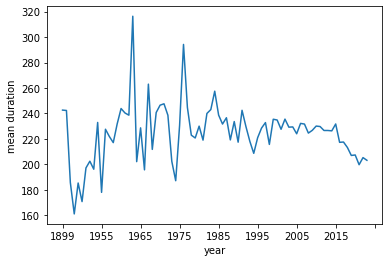

In [36]:
_ = lastfm[(lastfm['duration'] != 0) & (~lastfm['album release date'].isna())]\
.groupby('album_year')['duration']\
.mean()\
.plot(xlabel='year', ylabel='mean duration')

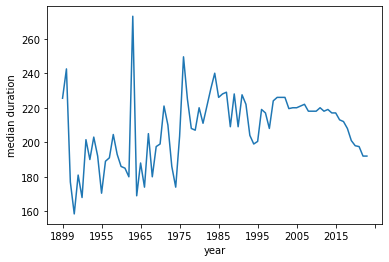

In [37]:
_ = lastfm[(lastfm['duration'] != 0) & (~lastfm['album release date'].isna())]\
.groupby('album_year')['duration']\
.median()\
.plot(xlabel='year', ylabel='median duration')

#### У какого исполнителя в датасете наибольшее число альбомов (top 10)

In [38]:
lastfm.groupby('album artist')['album href']\
.nunique()\
.reset_index()\
.sort_values(by = 'album href', ascending=False)\
.reset_index(drop=True)\
.head(10)

album artist  album href
0            Various Artists          36
1   Bob Marley & The Wailers          26
2               Lana Del Rey          23
3                Johnny Cash          23
4                      Queen          21
5               Joy Division          20
6                Miles Davis          20
7  Siouxsie and the Banshees          19
8    Wolfgang Amadeus Mozart          18
9                 Bob Marley          17

In [39]:
tags = list(lastfm['album tag'].unique())
lastfm['tag index'] = lastfm['album tag'].swifter.apply(lambda x: tags.index(x))
lastfm['album_'] = lastfm['album_year'].swifter.apply(lambda x: 0 if x == 'nan' else int(x))

Pandas Apply:   0%|          | 0/142335 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/142335 [00:00<?, ?it/s]

#### Связь между длительностью трека и кол-вом уникальных слушателей трека. В расчет берутся треки длительностью не более 10 минут.

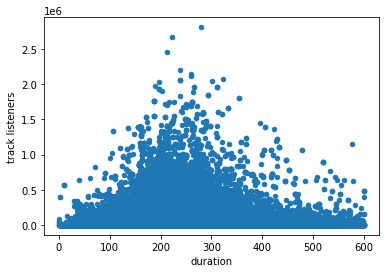

In [40]:
truncated = lastfm[(0 < lastfm['duration'] ) & (lastfm['duration'] <= 600)]
_ = truncated.plot.scatter(x='duration', y='track listeners')

#### Связь между длительностью трека и кол-вом прослушиваний трека (scrobbles). В расчет берутся треки длительностью не более 10 минут.

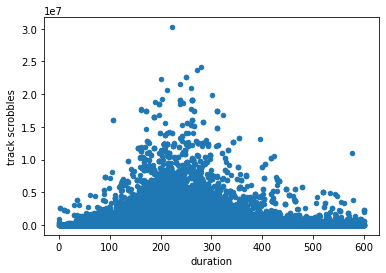

In [41]:
_ = truncated.plot.scatter(x='duration', y='track scrobbles')

#### Как видно наиболее популярные треки имеют длительность около 4 минут

#### Диаграммы рассеяния duration/track listeners по тегам

In [42]:
%matplotlib inline

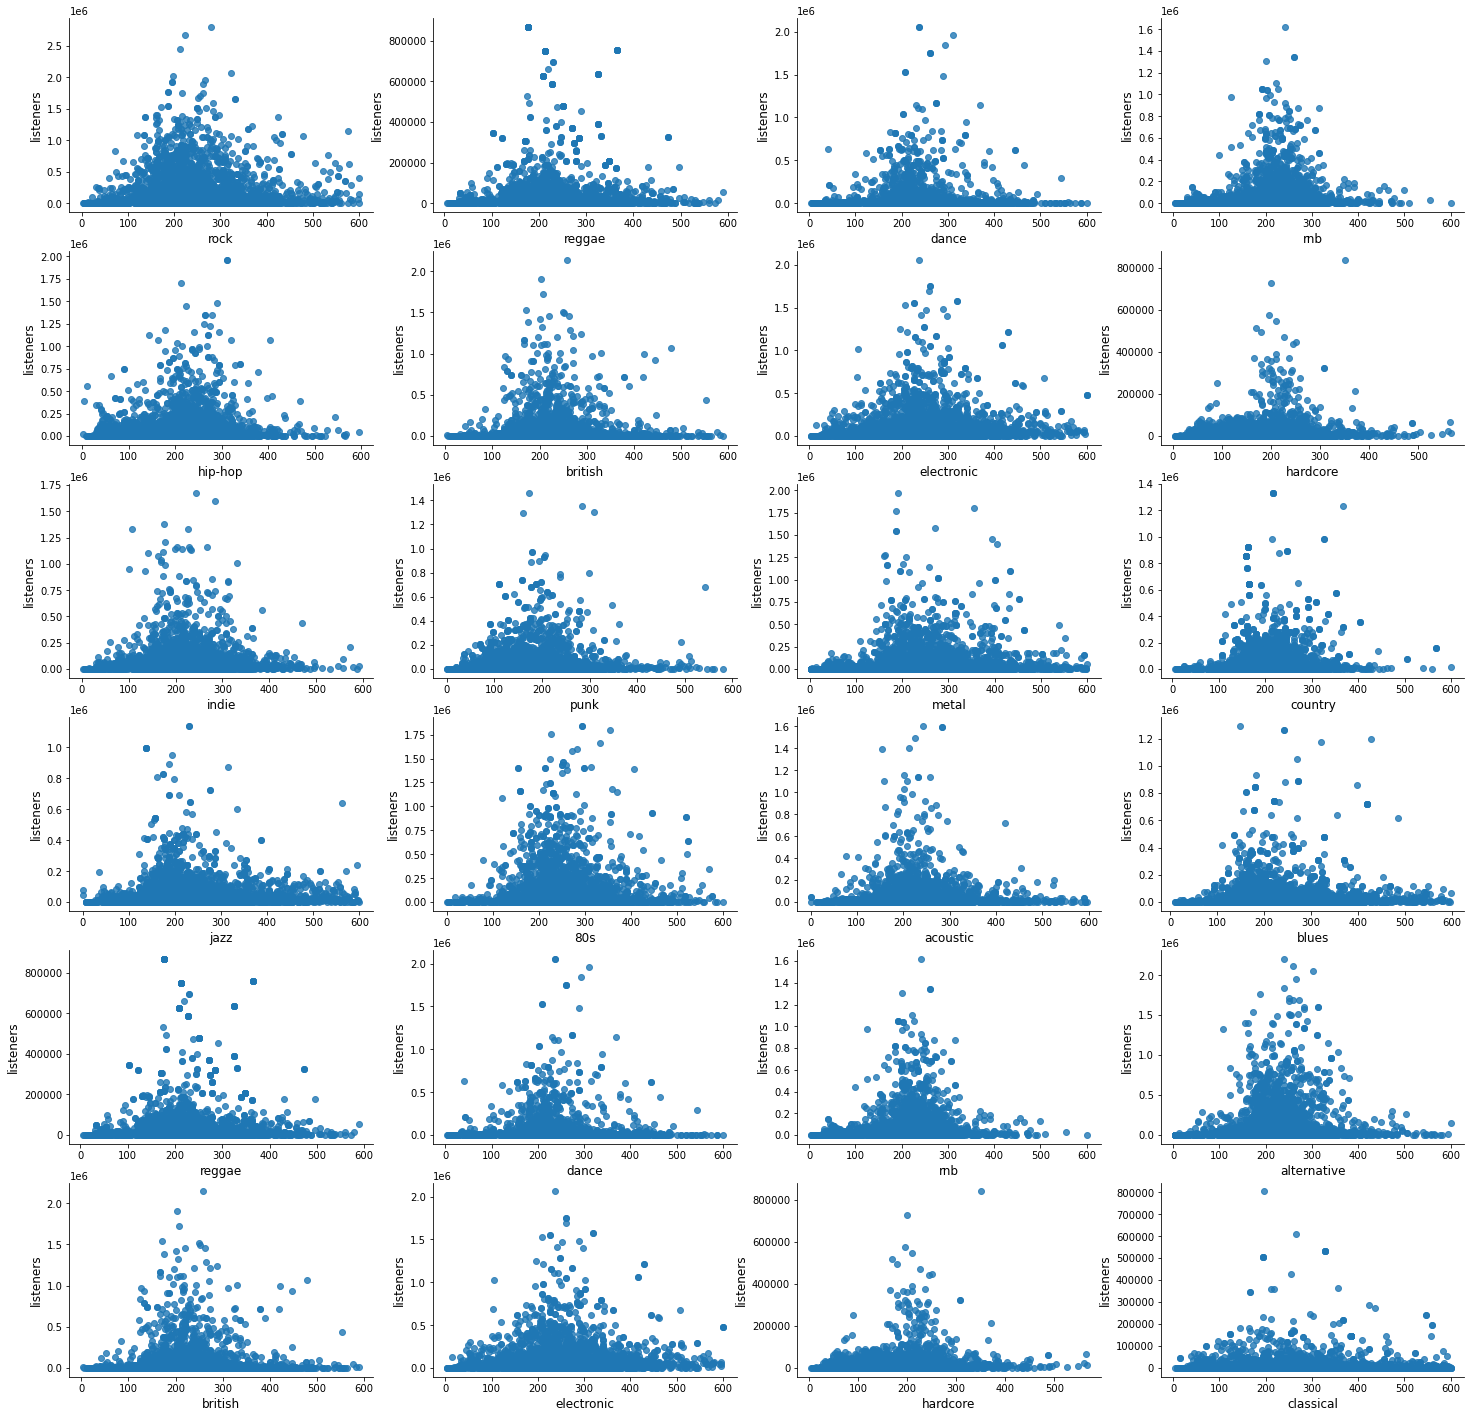

In [43]:
fig, ax = plt.subplots(6, 4, figsize=(25,25))
for x in range(6):
    for y in range(4):
        ax[x][y].set_ylabel('listeners', fontsize=12)
        ax[x][y].locator_params(integer=True)
        ax[x][y].spines['right'].set_visible(False)
        ax[x][y].spines['top'].set_visible(False)
        ax[x][y].xaxis.set_tick_params(width=0.8)
        ax[x][y].yaxis.set_tick_params(width=0.8)
        for axis in ['bottom','left']:
            ax[x][y].spines[axis].set_linewidth(0.8)
        tag_index = x + 4 * y
        if tag_index < 24:
            ax[x][y].set_xlabel(tags[tag_index], fontsize=12)
            truncated_tag = truncated[truncated['tag index'] == tag_index]
            ax[x][y].scatter(x=truncated_tag['duration'],
                             y=truncated_tag['track listeners'],
                             alpha=0.8)   

#### Топ 20 исполнителей по популярности (по кол-ву прослушиваний - scrobbles)

In [149]:
artist_by_year_scrobbles = lastfm\
.groupby(['album artist', 'track name'])\
.max('track scrobbles')\
.groupby(['album artist', 'album_'])\
.agg({'track scrobbles': 'sum'})\
.reset_index()\
.sort_values(by='track scrobbles', ascending=False)
artist_by_year_scrobbles.columns = ['artist', 'year', 'scrobbles']

In [150]:
top20 = artist_by_year_scrobbles\
.groupby('artist')\
.sum('scrobbles')\
.reset_index()\
.sort_values(by='scrobbles')\
.tail(20)[['artist','scrobbles']]

In [151]:
top20\
.iplot(
        x = 'artist',
        y = 'scrobbles',
        kind='bar',
        bins=10,
        yTitle='artist',
        linecolor='black',
        xTitle='scrobbles' ,
        title='Scrobbles by artists',
        orientation = 'h'
)

##### Диаграммы для первой 20ки популярных исполнителей. Распределение прослушиваний по году релиза альбомы.

In [203]:
top20_artists = list(top20['artist'])

In [213]:
fig = py.subplots.make_subplots(rows=10, cols=2, start_cell="bottom-left")
for row in range(10):
    for col in range(2):
        artist = top20_artists[col + 2 * row]
        bar_chart = artist_by_year_scrobbles[(artist_by_year_scrobbles['artist'] == artist) & 
                                             (artist_by_year_scrobbles['year'] > 0)]
        fig.add_trace(go.Bar(x=bar_chart['year'], y=bar_chart['scrobbles'], name=artist), 
                      row=row+1, col=col+1)
fig.update_layout(height=2000, width=1000, title_text="Artist scrobbles by album relese year")
fig.show()